In [3]:
from __future__ import division
from sys import exit
from math import sqrt
from numpy import array
from scipy.optimize import fmin_l_bfgs_b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def RMSE(params, *args):

    Y = args[0]
    type = args[1]
    rmse = 0

    if type == 'linear':

        alpha, beta = params
        a = [Y[0]]
        b = [Y[1] - Y[0]]
        y = [a[0] + b[0]]

        for i in range(len(Y)):

            a.append(alpha * Y[i] + (1 - alpha) * (a[i] + b[i]))
            b.append(beta * (a[i + 1] - a[i]) + (1 - beta) * b[i])
            y.append(a[i + 1] + b[i + 1])

    else:

        alpha, beta, gamma = params
        m = args[2]     
        a = [sum(Y[0:m]) / float(m)]
        b = [(sum(Y[m:2 * m]) - sum(Y[0:m])) / m ** 2]

        if type == 'additive':

            s = [Y[i] - a[0] for i in range(m)]
            y = [a[0] + b[0] + s[0]]

            for i in range(len(Y)):

                a.append(alpha * (Y[i] - s[i]) + (1 - alpha) * (a[i] + b[i]))
                b.append(beta * (a[i + 1] - a[i]) + (1 - beta) * b[i])
                s.append(gamma * (Y[i] - a[i] - b[i]) + (1 - gamma) * s[i])
                y.append(a[i + 1] + b[i + 1] + s[i + 1])

        elif type == 'multiplicative':

            s = [Y[i] / a[0] for i in range(m)]
            y = [(a[0] + b[0]) * s[0]]

            for i in range(len(Y)):

                a.append(alpha * (Y[i] / s[i]) + (1 - alpha) * (a[i] + b[i]))
                b.append(beta * (a[i + 1] - a[i]) + (1 - beta) * b[i])
                s.append(gamma * (Y[i] / (a[i] + b[i])) + (1 - gamma) * s[i])
                y.append((a[i + 1] + b[i + 1]) * s[i + 1])

        else:

            exit('Type must be either linear, additive or multiplicative')

    rmse = sqrt(sum([(m - n) ** 2 for m, n in zip(Y, y[:-1])]) / len(Y))

    return rmse

In [9]:

def multiplicative(x, m, fc, alpha = None, beta = None, gamma = None):

    Y = x[:]  # Y是输入，也就是x。

    if (alpha == None or beta == None or gamma == None):

        initial_values = array([0.0, 1.0, 0.0])
        boundaries = [(0, 1), (0, 1), (0, 1)]
        type = 'multiplicative'

        parameters = fmin_l_bfgs_b(RMSE, x0 = initial_values, args = (Y, type, m), bounds = boundaries, approx_grad = True)
        alpha, beta, gamma = parameters[0]

    a = [sum(Y[0:m]) / float(m)]                     #s
    b = [(sum(Y[m:2 * m]) - sum(Y[0:m])) / m ** 2]   # t
    s = [Y[i] / a[0] for i in range(m)]              # p
    y = [(a[0] + b[0]) * s[0]]
    rmse = 0

    for i in range(len(Y) + fc):

        if i == len(Y):
            Y.append((a[-1] + b[-1]) * s[-m])  # 加入预测值

        a.append(alpha * (Y[i] / s[i]) + (1 - alpha) * (a[i] + b[i]))
        b.append(beta * (a[i + 1] - a[i]) + (1 - beta) * b[i])
        s.append(gamma * (Y[i] / (a[i] + b[i])) + (1 - gamma) * s[i])
        y.append((a[i + 1] + b[i + 1]) * s[i + 1])

    rmse = sqrt(sum([(m - n) ** 2 for m, n in zip(Y[:-fc], y[:-fc - 1])]) / len(Y[:-fc]))

    return Y,y, alpha, beta, gamma, rmse

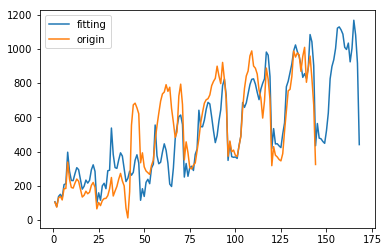

In [28]:
peo = pd.read_csv("top2peo")
data=np.array(peo.peo).tolist()
Y,y,alpha,beta,gamma,rsme =multiplicative(data,24,24)
X=range(1,169)
x=range(1,145)
plt.plot(X,y[:168],label='fitting')
plt.plot(x,data,label='origin')
plt.legend(loc='best')
plt.show()

In [18]:
data

[105.0,
 76.0,
 130.0,
 139.0,
 118.0,
 184.0,
 185.0,
 339.0,
 240.0,
 191.0,
 187.0,
 216.0,
 240.0,
 227.0,
 180.0,
 135.0,
 145.0,
 169.0,
 154.0,
 163.0,
 203.0,
 220.0,
 191.0,
 66.0,
 103.0,
 85.0,
 114.0,
 126.0,
 127.0,
 143.0,
 183.0,
 249.0,
 141.0,
 170.0,
 197.0,
 239.0,
 273.0,
 229.0,
 200.0,
 70.0,
 13.0,
 166.0,
 554.0,
 673.0,
 683.0,
 656.0,
 621.0,
 335.0,
 393.0,
 311.0,
 287.0,
 277.0,
 267.0,
 320.0,
 350.0,
 465.0,
 550.0,
 625.0,
 695.0,
 737.0,
 748.0,
 791.0,
 752.0,
 776.0,
 652.0,
 571.0,
 483.0,
 515.0,
 725.0,
 794.0,
 675.0,
 352.0,
 457.0,
 394.0,
 306.0,
 299.0,
 321.0,
 334.0,
 406.0,
 476.0,
 568.0,
 629.0,
 683.0,
 703.0,
 709.0,
 731.0,
 785.0,
 810.0,
 828.0,
 899.0,
 842.0,
 797.0,
 921.0,
 822.0,
 705.0,
 373.0,
 462.0,
 399.0,
 409.0,
 379.0,
 371.0,
 431.0,
 490.0,
 649.0,
 768.0,
 842.0,
 871.0,
 959.0,
 988.0,
 900.0,
 887.0,
 853.0,
 759.0,
 713.0,
 596.0,
 697.0,
 888.0,
 823.0,
 707.0,
 318.0,
 429.0,
 379.0,
 369.0,
 354.0,
 346.0,
 388.

In [20]:
y

[107.23486200333095,
 79.235228804821944,
 138.30091601237208,
 150.83412641763815,
 130.55779601871674,
 207.49797763502252,
 212.56329804108165,
 396.72329288603356,
 285.97430406852231,
 231.65320406059149,
 230.78201086525482,
 271.16916488222677,
 306.40732809897668,
 294.64182330081661,
 237.46788008565289,
 180.97430406852234,
 197.46604607819793,
 233.74714489650228,
 216.27815449282238,
 232.38714410341797,
 293.73539733523643,
 323.0164961535408,
 284.50236933936043,
 99.714489650249718,
 159.57398772112316,
 116.19238409563395,
 199.9530245433088,
 215.1027846388964,
 183.73120933429243,
 288.27621237321216,
 291.65580988356027,
 537.80158932257359,
 383.15151398237367,
 306.86056750793125,
 302.34822946748864,
 351.46794213041312,
 393.02109681969227,
 374.11768094631589,
 298.5633096152377,
 225.36260485986674,
 243.61371374292648,
 285.76336187390092,
 262.07536288931328,
 279.17553715044079,
 349.91931550960595,
 381.65747908111445,
 333.47254966924606,
 115.969038713619

In [25]:
cc=[0,-1]
a=cc[:-2]
a

[]

In [21]:
Y

[105.0,
 76.0,
 130.0,
 139.0,
 118.0,
 184.0,
 185.0,
 339.0,
 240.0,
 191.0,
 187.0,
 216.0,
 240.0,
 227.0,
 180.0,
 135.0,
 145.0,
 169.0,
 154.0,
 163.0,
 203.0,
 220.0,
 191.0,
 66.0,
 103.0,
 85.0,
 114.0,
 126.0,
 127.0,
 143.0,
 183.0,
 249.0,
 141.0,
 170.0,
 197.0,
 239.0,
 273.0,
 229.0,
 200.0,
 70.0,
 13.0,
 166.0,
 554.0,
 673.0,
 683.0,
 656.0,
 621.0,
 335.0,
 393.0,
 311.0,
 287.0,
 277.0,
 267.0,
 320.0,
 350.0,
 465.0,
 550.0,
 625.0,
 695.0,
 737.0,
 748.0,
 791.0,
 752.0,
 776.0,
 652.0,
 571.0,
 483.0,
 515.0,
 725.0,
 794.0,
 675.0,
 352.0,
 457.0,
 394.0,
 306.0,
 299.0,
 321.0,
 334.0,
 406.0,
 476.0,
 568.0,
 629.0,
 683.0,
 703.0,
 709.0,
 731.0,
 785.0,
 810.0,
 828.0,
 899.0,
 842.0,
 797.0,
 921.0,
 822.0,
 705.0,
 373.0,
 462.0,
 399.0,
 409.0,
 379.0,
 371.0,
 431.0,
 490.0,
 649.0,
 768.0,
 842.0,
 871.0,
 959.0,
 988.0,
 900.0,
 887.0,
 853.0,
 759.0,
 713.0,
 596.0,
 697.0,
 888.0,
 823.0,
 707.0,
 318.0,
 429.0,
 379.0,
 369.0,
 354.0,
 346.0,
 388.